<a href="https://colab.research.google.com/github/Arhhip/My_First_Test_Repo/blob/master/laba3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 1. Подключение Pandas и NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [83]:
df_init = pd.DataFrame({
    'ТЭС': ['Сургутская ГРЭС-2','Рефтинская ГРЭС','Костромская ГРЭС','Костромская ГРЭС','Рязанская ГРЭС'],
    'ВЛАДЕЛЕЦ': ['"Э.Он Россия"','"Энел Россия"','"Интер РАО"','"Газпром энергохолдинг"','"Газпром энергохолдинг"'],
    'РЕГИОН': ['Ханты-Мансийский АО','Свердловская область','Костромская область','Ханты-Мансийский АО','Рязанская область'],
    'МОЩНОСТЬ(ГВТ)': [5.6,3.8,3.6,3.3,3.3],

})
df_init.head()

,ТЭС,ВЛАДЕЛЕЦ,РЕГИОН,МОЩНОСТЬ(ГВТ)
0,Сургутская ГРЭС-2,"""Э.Он Россия""",Ханты-Мансийский АО,5.6
1,Рефтинская ГРЭС,"""Энел Россия""",Свердловская область,3.8
2,Костромская ГРЭС,"""Интер РАО""",Костромская область,3.6
3,Костромская ГРЭС,"""Газпром энергохолдинг""",Ханты-Мансийский АО,3.3
4,Рязанская ГРЭС,"""Газпром энергохолдинг""",Рязанская область,3.3


In [84]:
df_init = df_init.sort_values(['МОЩНОСТЬ(ГВТ)'])
print(df_init)
print()

# ascending задает сортировку по убыванию или возрастанию
# по умолчанию True - сортировка по убыванию, если поставить False, то будет по возрастанию
df_init = df_init.sort_values(['МОЩНОСТЬ(ГВТ)'], ascending = False)
print(df_init)

                 ТЭС  ... МОЩНОСТЬ(ГВТ)
3   Костромская ГРЭС  ...           3.3
4     Рязанская ГРЭС  ...           3.3
2   Костромская ГРЭС  ...           3.6
1    Рефтинская ГРЭС  ...           3.8
0  Сургутская ГРЭС-2  ...           5.6

[5 rows x 4 columns]

                 ТЭС  ... МОЩНОСТЬ(ГВТ)
0  Сургутская ГРЭС-2  ...           5.6
1    Рефтинская ГРЭС  ...           3.8
2   Костромская ГРЭС  ...           3.6
3   Костромская ГРЭС  ...           3.3
4     Рязанская ГРЭС  ...           3.3

[5 rows x 4 columns]


In [85]:
df_init_2 = df_init.copy()
df_init_2['выработка_за_сутки'] = df_init_2['МОЩНОСТЬ(ГВТ)'] * 24 # 24 часа в сутках
print(df_init_2)
print()


                 ТЭС  ... выработка_за_сутки
0  Сургутская ГРЭС-2  ...              134.4
1    Рефтинская ГРЭС  ...               91.2
2   Костромская ГРЭС  ...               86.4
3   Костромская ГРЭС  ...               79.2
4     Рязанская ГРЭС  ...               79.2

[5 rows x 5 columns]



In [86]:
print(df_init[df_init['МОЩНОСТЬ(ГВТ)'] > 3.5])
print()


                 ТЭС       ВЛАДЕЛЕЦ                РЕГИОН  МОЩНОСТЬ(ГВТ)
0  Сургутская ГРЭС-2  "Э.Он Россия"   Ханты-Мансийский АО            5.6
1    Рефтинская ГРЭС  "Энел Россия"  Свердловская область            3.8
2   Костромская ГРЭС    "Интер РАО"   Костромская область            3.6



In [87]:
print('данные из первой строки и второго столбца')
print(df_init_2.iloc[1 , 2])
print()

данные из первой строки и второго столбца
Свердловская область



In [88]:
print(df_init.groupby(['РЕГИОН'])['МОЩНОСТЬ(ГВТ)'].sum())
print()

РЕГИОН
Костромская область     3.6
Рязанская область       3.3
Свердловская область    3.8
Ханты-Мансийский АО     8.9
Name: МОЩНОСТЬ(ГВТ), dtype: float64



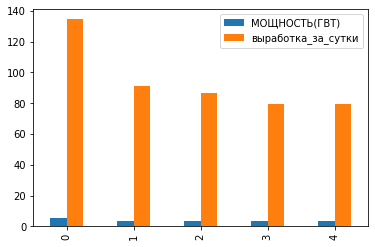

In [89]:
df_init_2.plot(kind = 'bar')
print()

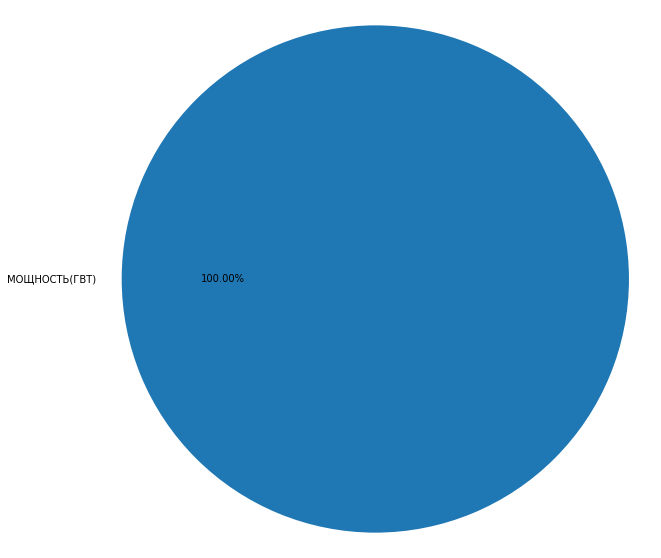

In [81]:
init_2_matrix = df_init_2.values
generation_sum = (init_2_matrix[:,3 : 4]).sum(axis = 0)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = df_init_2.columns[3 : 4]

fig1, ax1 = plt.subplots(figsize = (10, 10))
ax1.pie(generation_sum, labels = labels, autopct = '%1.2f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [70]:
output_notebook() # чтобы график показывался прямо в блокноте

#Построение графика
p = figure(plot_width = 800, plot_height = 400)

p.line(np.arange(len(df_init_2)), df_init_2['МОЩНОСТЬ(ГВТ)'], line_width = 2)
p.line(np.arange(len(df_init_2)), df_init_2['выработка_за_сутки'], line_width = 2, color = 'green')

show(p)